In [74]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from onnxmltools.convert.sklearn import convert
from onnxmltools.utils import save_model
from onnxmltools.convert.common.data_types import Int64TensorType

In [75]:
cols = ['gre', 'gpa', 'rank']

# import data
df_raw = pd.read_csv('s3://helen-ml/week-3/grad_school.csv')

df_raw.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [76]:
cols = ['gre','gpa','rank']
features = df_raw[cols]
features_scaled = MinMaxScaler().fit_transform(features)
df = pd.DataFrame(features_scaled, columns=cols).join(df_raw['admit'])

df.head()

,gre,gpa,rank,admit
0,0.275862,0.775862,0.666667,0
1,0.758621,0.810345,0.666667,1
2,1.000000,1.000000,0.000000,1
3,0.724138,0.534483,1.000000,1
4,0.517241,0.385057,1.000000,0


In [77]:
# split into training and test sets
train, test = train_test_split(df, test_size=0.3)

train.head()

,gre,gpa,rank,admit
6,0.586207,0.413793,0.000000,1
277,0.620690,0.758621,0.000000,1
317,0.965517,0.787356,1.000000,1
43,0.482759,0.603448,0.666667,0
138,0.689655,0.655172,0.333333,0


In [78]:
def try_tree(n_estimators):
    # define Decision Tree model
    clf = RandomForestClassifier(n_estimators)

    # "fit" model
    clf.fit(train[cols], train['admit'])

    # calculate prediction on the test set
    predictions = clf.predict(test[cols])

    # calculate accuracy
    acc = accuracy_score(test['admit'], predictions)
    return acc

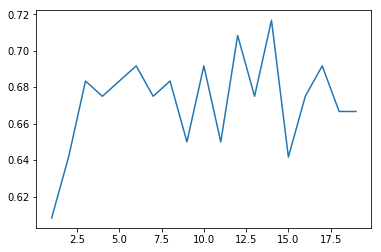

In [79]:
plot_x = list()
plot_y = list()

for n in range(1, 20):
    plot_x.append(n)
    plot_y.append(try_tree(n))
    
plt.plot(plot_x, plot_y)
plt.show()

In [80]:
model = RandomForestClassifier(14)

# "fit" model
model.fit(train[cols], train['admit'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=14, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
test_input = test[cols]
initial_types = [('input', FloatTensorType([1, 3]))]
onnx_model = convert(model, initial_types=initial_types)

save_model(onnx_model, 'w3-practicum-random-forest.onnx')

simple model: <class 'sklearn.ensemble.forest.RandomForestClassifier'> 
